## Multiple Linear Regression
### and backward elimination
#### all chosen indicators (economics, eduction, environment, infrastructure, political policy)

The purpose of this notebook is to 
* apply Multiple Linear Regression to the preprocessed dataset
* apply backward elimination to the model
* ultimately find out the independent variables (World Development Idicators) which influence the dependent variable (Happy Planet Index) the most.

The model will be applied to the "wdi_hpi_2016_economics" dataset, which was created in the Data Preprocessing JNotebook. This dataset is based on
* the Happy Planet Index for 2016 (see https://happyplanetindex.org/),
* the World Development Indicators (1960 - 2019) by the World Bank (see https://datacatalog.worldbank.org/dataset/world-development-indicators)

In [1]:
# Import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import dataset
dataset = pd.read_pickle('../data/wdi_hpi_2016_df.pkl')
picture_name = '../data/pictures/All_corr.eps'

In [3]:
# Standardize data for the model
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit dataset to scaler object
dataset_scaled = dataset.iloc[:, 1:].values    # Exclude Country column 
scaler.fit(dataset_scaled)

# Transform data into scaled data
dataset_scaled = pd.DataFrame(scaler.transform(dataset_scaled))

In [4]:
# Split dataset into X (matrix of independent variables) and y (vector of dependent variable)
X = dataset_scaled.iloc[:, 1:-1].values
y = dataset_scaled.iloc[:, dataset_scaled.shape[1]-1].values

# Split datasets into Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.0)    # no split, as model is not used for prediction

In [5]:
# Fit Multiple Linear Regression Model to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
# Predict the Test set results
#y_pred = regressor.predict(X_test)

In [7]:
# Reduce less important variables with Backward Elimination
import statsmodels.regression.linear_model as sm

# for statsmodel to understand the multiple linear regression equation a new column with b0 equals one is required (y = b0 + b1*x1 + b2*x2 + ... + bn*xn)
X_opt = np.append(arr = np.ones((len(X), 1)).astype(int), values = X, axis = 1)   # Add X to the newly created array of 1s
#X_opt = X_opt[:, list(range(X_opt.shape[1]))]

X_cols = dataset.columns[1:-1].tolist()    # save headers to determin most important variables later
X_cols.insert(0,'b0')

X_mod1, X_mod2 = X_opt.copy(), X_opt.copy()
X_cols_mod1, X_cols_mod2 = X_cols.copy(), X_cols.copy()

regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     5.032
Date:                Fri, 06 Mar 2020   Prob (F-statistic):           3.82e-11
Time:                        12:03:21   Log-Likelihood:                -119.64
No. Observations:                 139   AIC:                             321.3
Df Residuals:                      98   BIC:                             441.6
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.416e-15      0.058   2.45e-14      1.000      -0.115       0.115
x1             0.0246      0.082      0.299      0.765      -0.139       0.188
x2            -0.0423      0.099     -0.429      0.669      -0.238       0.153
x3             0.0777      0.086      0.907      0.367      -0.092       0.248
x4            -0.1956      0.183     -1.066      0.289      -0.560       0.168
x5            -0.0507      0.091     -0.560      0.577      -0.230       0.129
x6            -0.0992      0.070     -1.412      0.161      -0.239       0.040
x7            -0.1302      0.098     -1.323      0.189      -0.325       0.065
x8            -0.1280      0.091     -1.411      0.161      -0.308       0.052
x9            -0.0778      0.625     -0.124      0.901      -1.318       1.163
x10            0.1840      0.637      0.289      0.773      -1.080       1.448
x11           -0.0430      0.091     -0.472      0.638      -0.224       0.138
x12           -0.0316      0.078     -0.404      0.687      -0.187       0.124
x13            0.0320      0.096      0.333      0.740      -0.159       0.223
x14            0.1477      0.076      1.942      0.055      -0.003       0.299
x15           -0.0746      0.078     -0.954      0.342      -0.230       0.081
x16            0.0351      0.095      0.371      0.712      -0.153       0.223
x17           -0.1533      0.179     -0.857      0.394      -0.508       0.202
x18            0.0982      0.211      0.466      0.642      -0.320       0.516
x19           -0.1841      0.072     -2.572      0.012      -0.326      -0.042
x20           -0.0474      0.084     -0.566      0.573      -0.213       0.119
x21           -0.0447      0.046     -0.976      0.331      -0.136       0.046
x22           -0.0460      0.094     -0.490      0.626      -0.232       0.140
x23           -0.0552      0.052     -1.056      0.294      -0.159       0.049
x24           -0.0782      0.129     -0.606      0.546      -0.334       0.178
x25            0.1202      0.088      1.361      0.177      -0.055       0.295
x26            0.0057      0.094      0.061      0.952      -0.182       0.193
x27            0.0601      0.078      0.775      0.440      -0.094       0.214
x28           -0.3873      0.175     -2.214      0.029      -0.735      -0.040
x29            0.0796      0.077      1.039      0.301      -0.072       0.232
x30            0.2353      0.104      2.255      0.026       0.028       0.442
x31           -0.0877      0.078     -1.127      0.262      -0.242       0.067
x32           -0.0962      0.115     -0.837      0.405      -0.324       0.132
x33           -0.0834      0.094     -0.892      0.375      -0.269       0.102
x34           -0.0832      0.093     -0.892      0.374      -0.268       0.102
x35            0.1206      0.100      1.203      0.232      -0.078       0.320
x3

In [8]:
#corr_cols = X_cols_mod1.copy()
#corr_cols.append('Happy Planet Index')
corr = dataset.corr()
corr

,AG.LND.AGRI.ZS,AG.LND.FRST.ZS,AG.PRD.FOOD.XD,AG.PRD.LVSK.XD,EG.ELC.ACCS.ZS,EN.POP.DNST,ER.PTD.TOTL.ZS,FB.ATM.TOTL.P5,FB.CBK.BRCH.P5,FP.CPI.TOTL,...,SE.TER.ENRR,SE.XPD.TOTL.GB.ZS,SE.XPD.TOTL.GD.ZS,SH.H2O.BASW.ZS,SH.H2O.SMDW.ZS,SH.MED.PHYS.ZS,SH.STA.BASS.ZS,SP.DYN.LE00.IN,SP.POP.GROW,Happy Planet Index
AG.LND.AGRI.ZS,1.000000,-0.513212,0.111400,0.081465,-0.249895,-0.096123,-0.121239,-0.180248,-0.098134,-0.050613,...,-0.228995,-0.109486,-0.238247,-0.244360,-0.186392,-0.115239,-0.220432,-0.338617,0.009316,-0.193159
AG.LND.FRST.ZS,-0.513212,1.000000,0.021384,0.053083,0.150886,-0.061239,0.270571,0.218757,0.116618,0.067656,...,0.198430,0.095791,0.171216,0.187801,0.090600,0.057946,0.080645,0.169563,-0.213649,0.138695
AG.PRD.FOOD.XD,0.111400,0.021384,1.000000,0.566553,-0.371342,-0.251553,-0.041161,-0.246216,-0.285096,-0.010234,...,-0.306184,0.114546,-0.244549,-0.446098,-0.389364,-0.271180,-0.460864,-0.448327,0.349747,-0.135297
AG.PRD.LVSK.XD,0.081465,0.053083,0.566553,1.000000,-0.376157,-0.216122,-0.101437,-0.211043,-0.253491,0.092637,...,-0.255905,0.148167,-0.111859,-0.331469,-0.344953,-0.352423,-0.382278,-0.390090,0.379444,-0.055814
EG.ELC.ACCS.ZS,-0.249895,0.150886,-0.371342,-0.376157,1.000000,0.058285,-0.023911,0.435710,0.405736,0.004280,...,0.429272,-0.030585,0.271063,0.891299,0.360140,0.422605,0.877235,0.807001,-0.572578,0.467340
EN.POP.DNST,-0.096123,-0.061239,-0.251553,-0.216122,0.058285,1.000000,0.141347,-0.009529,0.030559,-0.025717,...,0.032960,0.051193,-0.172853,0.092047,0.092021,-0.023274,0.075304,0.166386,-0.043438,-0.058481
ER.PTD.TOTL.ZS,-0.121239,0.270571,-0.041161,-0.101437,-0.023911,0.141347,1.000000,0.121934,0.194142,0.156641,...,0.146925,-0.081565,0.085690,0.000712,0.065952,0.122537,-0.040536,0.085164,-0.047798,-0.132723
FB.ATM.TOTL.P5,-0.180248,0.218757,-0.246216,-0.211043,0.435710,-0.009529,0.121934,1.000000,0.504330,-0.028472,...,0.533742,-0.251634,0.128676,0.484563,0.380200,0.463098,0.491248,0.571887,-0.407812,0.107514
FB.CBK.BRCH.P5,-0.098134,0.116618,-0.285096,-0.253491,0.405736,0.030559,0.194142,0.504330,1.000000,-0.030252,...,0.316836,-0.158000,0.096519,0.443399,0.252611,0.402689,0.417549,0.533914,-0.330291,0.084026
FP.CPI.TOTL,-0.050613,0.067656,-0.010234,0.092637,0.004280,-0.025717,0.156641,-0.028472,-0.030252,1.000000,...,-0.024889,0.025488,-0.023697,-0.006541,-0.050360,-0.050594,0.001629,-0.059934,-0.111186,0.065331


In [9]:
# Fuction to automatically remove columns where P-value is below significance level of 5%
def backward_elimination(x, X_cols_mod, significance = 0.05):
    '''
    Remove the independent variables where P-values in the multiple linear regression model 
    are below a certain significance level (standard value = 5%)
    imput:  x =  "modified X" = DataFrame with independent variables and a new column with ones for b0 (y = b0 + b1*x1 + b2*x2 + ... + bn*xn)
            X_cols_mod = list with column names of the x DataFrame
            significance = float with significance level for P-values
    output: x = modified DataFrame only containing independent variables/columns with P-values > significance
            X_cols_mod = list with independent variables/columns with P-values > significance
    '''
    num_vars = len(x[0])
    for i in range(0, num_vars):
        regressor_OLS = sm.OLS(endog = y, exog = x).fit()
        max_var = max(regressor_OLS.pvalues).astype(float)
        if max_var > significance:
            for j in range(0, num_vars - i):
                if (regressor_OLS.pvalues[j].astype(float) == max_var):
                    x = np.delete(x, j, 1)
                    X_cols_mod.pop(j)
    print(regressor_OLS.summary())
    return x, X_cols_mod
             
backward_elimination(X_mod1, X_cols_mod1)
print(X_cols_mod1)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     25.27
Date:                Fri, 06 Mar 2020   Prob (F-statistic):           1.24e-21
Time:                        12:03:21   Log-Likelihood:                -138.14
No. Observations:                 139   AIC:                             290.3
Df Residuals:                     132   BIC:                             310.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1898      0.072     -2.641      0.0

,ER.PTD.TOTL.ZS,GC.TAX.TOTL.GD.ZS,IT.NET.BBND.P2,NY.GDP.MKTP.KD.ZG,SE.COM.DURS,SH.H2O.BASW.ZS,SH.STA.BASS.ZS,SP.POP.GROW,Happy Planet Index
ER.PTD.TOTL.ZS,1.000000,0.096753,0.172174,-0.084458,0.089524,0.000712,-0.040536,-0.047798,-0.132723
GC.TAX.TOTL.GD.ZS,0.096753,1.000000,0.364127,-0.149802,0.080200,0.204990,0.210556,-0.180978,0.006532
IT.NET.BBND.P2,0.172174,0.364127,1.000000,-0.113172,0.223951,0.627295,0.665568,-0.511506,0.185223
NY.GDP.MKTP.KD.ZG,-0.084458,-0.149802,-0.113172,1.000000,-0.132443,-0.056737,-0.095316,0.198591,0.019509
SE.COM.DURS,0.089524,0.080200,0.223951,-0.132443,1.000000,0.395343,0.341154,-0.141919,0.273462
SH.H2O.BASW.ZS,0.000712,0.204990,0.627295,-0.056737,0.395343,1.000000,0.882600,-0.625255,0.459057
SH.STA.BASS.ZS,-0.040536,0.210556,0.665568,-0.095316,0.341154,0.882600,1.000000,-0.616264,0.421342
SP.POP.GROW,-0.047798,-0.180978,-0.511506,0.198591,-0.141919,-0.625255,-0.616264,1.000000,-0.246273
Happy Planet Index,-0.132723,0.006532,0.185223,0.019509,0.273462,0.459057,0.421342,-0.246273,1.000000


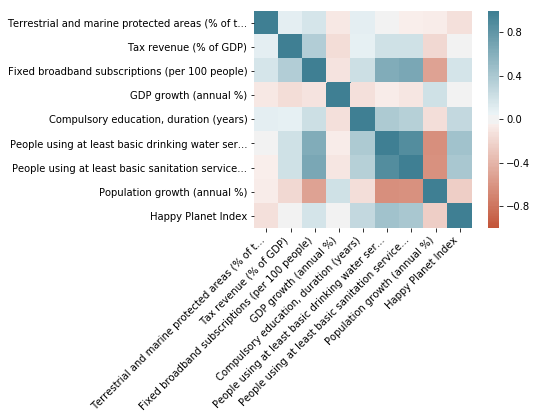

In [10]:
# Create Correlation Matrix with Seaborn (only remaining columns from backward elimination)

# Translate WDI abbreviations into meaningsful indicator descriptions
chosen_columns = pd.read_pickle('../data/WDI_chosen_columns.pkl')

corr_cols_descr = []
for ind in X_cols_mod1:
    descr = chosen_columns['Indicator Name'][chosen_columns['Indicator Code'] == ind].to_string(index = False)
    corr_cols_descr.append(descr)
corr_cols_descr.append('Happy Planet Index')

# Import Seaborn and plot Correlation Matrix
import seaborn as sns

corr_cols = X_cols_mod1.copy()
corr_cols.append('Happy Planet Index')
corr = dataset[corr_cols].corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    yticklabels = corr_cols_descr,
    xticklabels = corr_cols_descr
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# Save Correlation Matrix to 
plt.savefig(picture_name, format = 'eps')

# Return Correlation Matrix
corr

In [11]:
# Fuction to automatically remove columns where P-value is below significance level of 5%
# and adjusted R² is improved
def backward_elimination_r2(x, X_cols_mod, significance = 0.05):
    '''
    Remove the independent variables where P-values in the multiple linear regression model 
    are below a certain significance level (standard value = 5%), but ensure adjusted R² is improved
    imput:  x =  "modified X" = DataFrame with independent variables and a new column with ones for b0 (y = b0 + b1*x1 + b2*x2 + ... + bn*xn)
            X_cols_mod = list with column names of the x DataFrame
            significance = float with significance level for P-values
    output: x = modified DataFrame only containing independent variables/columns with P-values > significance
            X_cols_mod = list with independent variables/columns with P-values > significance
    '''
    num_vars = len(x[0])
    temp = np.zeros((x.shape)).astype(int)
    for i in range(0, num_vars):
        regressor_OLS = sm.OLS(endog = y, exog = x).fit()
        max_var = max(regressor_OLS.pvalues).astype(float)
        adjR_before = regressor_OLS.rsquared_adj.astype(float)
        if max_var > significance:
            for j in range(0, num_vars - i):
                if (regressor_OLS.pvalues[j].astype(float) == max_var):
                    temp[:,j] = x[:, j]
                    x = np.delete(x, j, axis = 1)
                    tmp_col = X_cols_mod.pop(j)
                    tmp_regressor = sm.OLS(endog = y, exog = x).fit()
                    adjR_after = tmp_regressor.rsquared_adj.astype(float)
                    if (adjR_before >= adjR_after):
                        x_rollback = np.hstack((x, temp[:,[0,j]]))
                        x_rollback = np.delete(x_rollback, j, 1)
                        X_cols_rollback = X_cols_mod.append(tmp_col)
                        #x = np.hstack((x, temp[:,[0,j]]))
                        #x = np.delete(x, j, 1)
                        #X_cols_mod = X_cols_mod.append(tmp_col)
                        print (regressor_OLS.summary())
                        return x_rollback, X_cols_rollback
                    else:
                        continue
    regressor_OLS.summary()
    return x, X_cols_mod
    
backward_elimination_r2(X_mod2, X_cols_mod2)
print(X_cols_mod2)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     7.380
Date:                Fri, 06 Mar 2020   Prob (F-statistic):           3.28e-15
Time:                        12:03:22   Log-Likelihood:                -120.16
No. Observations:                 139   AIC:                             300.3
Df Residuals:                     109   BIC:                             388.4
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0644      0.071      0.911      0.3

,AG.PRD.FOOD.XD,AG.PRD.LVSK.XD,EG.ELC.ACCS.ZS,EN.POP.DNST,ER.PTD.TOTL.ZS,FB.ATM.TOTL.P5,FP.CPI.TOTL,GC.TAX.TOTL.GD.ZS,GC.TAX.YPKG.RV.ZS,IP.JRN.ARTC.SC,...,SE.PRM.ENRR,SE.SEC.ENRR,SE.TER.ENRR,SE.XPD.TOTL.GB.ZS,SH.H2O.BASW.ZS,SH.MED.PHYS.ZS,SH.STA.BASS.ZS,SP.POP.GROW,NE.IMP.GNFS.ZS,Happy Planet Index
AG.PRD.FOOD.XD,1.000000,0.566553,-0.371342,-0.251553,-0.041161,-0.246216,-0.010234,-0.316601,-0.114011,-0.049973,...,0.067230,-0.396827,-0.306184,0.114546,-0.446098,-0.271180,-0.460864,0.349747,-0.247078,-0.135297
AG.PRD.LVSK.XD,0.566553,1.000000,-0.376157,-0.216122,-0.101437,-0.211043,0.092637,-0.267042,0.044564,-0.041949,...,0.275329,-0.335285,-0.255905,0.148167,-0.331469,-0.352423,-0.382278,0.379444,-0.211941,-0.055814
EG.ELC.ACCS.ZS,-0.371342,-0.376157,1.000000,0.058285,-0.023911,0.435710,0.004280,0.097203,-0.068399,0.174354,...,-0.072705,0.634136,0.429272,-0.030585,0.891299,0.422605,0.877235,-0.572578,0.007416,0.467340
EN.POP.DNST,-0.251553,-0.216122,0.058285,1.000000,0.141347,-0.009529,-0.025717,-0.007116,0.027162,0.008943,...,0.069594,0.032142,0.032960,0.051193,0.092047,-0.023274,0.075304,-0.043438,0.450738,-0.058481
ER.PTD.TOTL.ZS,-0.041161,-0.101437,-0.023911,0.141347,1.000000,0.121934,0.156641,0.096753,0.057891,0.107734,...,-0.064415,0.125614,0.146925,-0.081565,0.000712,0.122537,-0.040536,-0.047798,0.170993,-0.132723
FB.ATM.TOTL.P5,-0.246216,-0.211043,0.435710,-0.009529,0.121934,1.000000,-0.028472,0.129143,0.153998,0.255117,...,-0.101137,0.487042,0.533742,-0.251634,0.484563,0.463098,0.491248,-0.407812,-0.003734,0.107514
FP.CPI.TOTL,-0.010234,0.092637,0.004280,-0.025717,0.156641,-0.028472,1.000000,-0.026807,-0.001721,-0.039398,...,-0.002938,-0.049221,-0.024889,0.025488,-0.006541,-0.050594,0.001629,-0.111186,-0.081630,0.065331
GC.TAX.TOTL.GD.ZS,-0.316601,-0.267042,0.097203,-0.007116,0.096753,0.129143,-0.026807,1.000000,0.196011,-0.176560,...,-0.041985,0.287745,0.169505,-0.080355,0.204990,0.351834,0.210556,-0.180978,0.280215,0.006532
GC.TAX.YPKG.RV.ZS,-0.114011,0.044564,-0.068399,0.027162,0.057891,0.153998,-0.001721,0.196011,1.000000,0.209718,...,-0.008378,0.062039,0.028542,0.108177,0.017534,-0.032484,-0.024222,0.158476,-0.066570,0.092528
IP.JRN.ARTC.SC,-0.049973,-0.041949,0.174354,0.008943,0.107734,0.255117,-0.039398,-0.176560,0.209718,1.000000,...,-0.039563,0.117890,0.195163,-0.101843,0.177934,0.147383,0.178521,-0.156887,-0.204092,0.008910


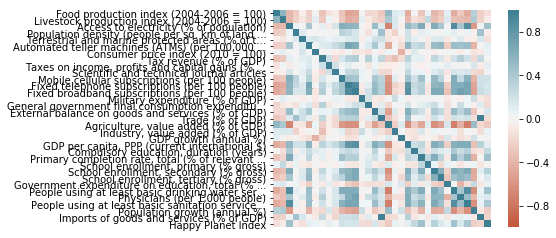

In [12]:
# Create Correlation Matrix with Seaborn

# Translate WDI abbreviations into meaningsful indicator descriptions
corr_cols_descr = []
for ind in X_cols_mod2:
    descr = chosen_columns['Indicator Name'][chosen_columns['Indicator Code'] == ind].to_string(index = False)
    corr_cols_descr.append(descr)
corr_cols_descr.append('Happy Planet Index')

corr_cols = X_cols_mod2.copy()
corr_cols.append('Happy Planet Index')
corr = dataset[corr_cols].corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    yticklabels = corr_cols_descr,
    xticklabels = False
)
'''
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
'''
corr